In [21]:
import numpy as np
import pandas as pd

def load_csv(fname):
    df = pd.read_csv(fname)
    df["time"] =  pd.to_datetime(df['time'], errors='coerce', unit='ms')
    df["total"] = np.linalg.norm(df[['x','y','z']].values, axis=1)
    return df

imu_df = load_csv("/Volumes/data/IMU_068.csv")
print (f"Loaded {len(imu_df)} samples over {(imu_df['time'].iloc[-1] - imu_df['time'].iloc[0]).total_seconds()}s!")

Loaded 196638 samples over 5883.788s!


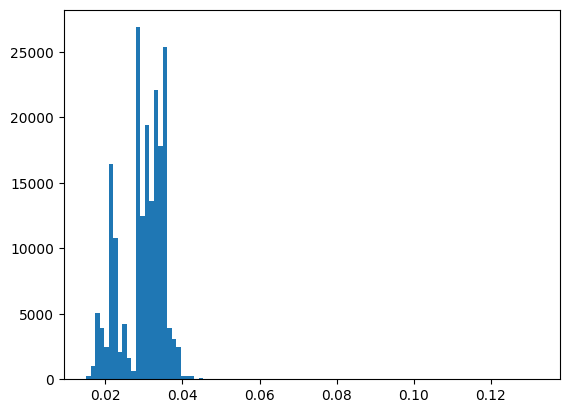

In [22]:
import matplotlib.pyplot as plt

import datetime as dt
plt.hist(imu_df['time'].diff().dt.total_seconds(), bins=100)
plt.show()

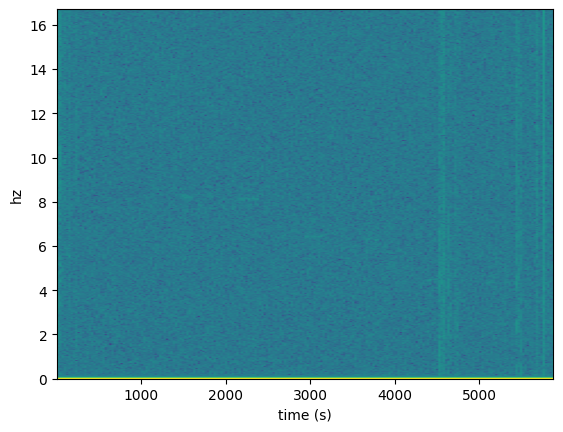

In [24]:
dt = imu_df['time'].diff().mean().total_seconds()
sample_rate = 1.0 / dt

plt.specgram(imu_df['total'], Fs=sample_rate, NFFT=1024, noverlap=128)
plt.xlabel("time (s)")
plt.ylabel("freq")
plt.show()